#**從理論到實作的機器學習攻略 Machine Learning V1**  
![GitHub release](https://img.shields.io/badge/作者-蔡佳祐_CaiJiaYou-green)
![GitHub release](https://img.shields.io/badge/Languages-Python-blue)  

<a href="https://www.youtube.com/@Joyous-Code_Teacher" target="_blank">
      <img src="https://img.shields.io/badge/Youtube-red?logo=youtube" />
</a>
<a href="https://www.instagram.com/joyous666ai/?hl=zh-tw" target="_blank">
      <img src="https://img.shields.io/badge/Instagram-white?logo=instagram" />
</a>
<a href="https://www.facebook.com/profile.php?id=61556582770963" target="_blank">
      <img src="https://img.shields.io/badge/Facebook-blue?logo=facebook" />
</a>
<a href="mailto:ab881027@gmail.com" target="_blank">
      <img src="https://img.shields.io/badge/Email-white?logo=gmail" />
</a>

![GitHub release](https://img.shields.io/badge/Email_1-ab881027@gmail.com-blue?logo=gmail)

##ex0 線性回歸基礎範例

In [1]:
import numpy as np	# 匯入數學模組
import matplotlib.pyplot as plt	# 匯入畫圖模組
from sklearn.linear_model import LinearRegression	# 匯入線新回歸模組

# 建立資料特徵 data
x = [[9.64], [8.35], [12.72], [9.31], [11.55], [14.38], [5.16], [4.07], [11.25], [7.37], [6.35]]
# 建立資料解答 target
y = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]

model = LinearRegression()		# 建立線新回歸模型
model.fit(x, y)		# 使用建立好的數據(x, y)訓練線性回歸模型
print('Bias: ', model.intercept_)	# 將訓練好的偏置顯示出來
print('Weight: ', model.coef_)		# 將訓練好的權重顯示出來

Bias:  3.080778436154989
Weight:  [0.48548614]


##ex1 線性回歸實際案例(房價預測)

Intercept: 50039.98400639737
Coefficients: [1999.20031987   39.9840064 ]
Predicted Price for a house with 180 square feet and 3 floors: [410015.99360256]


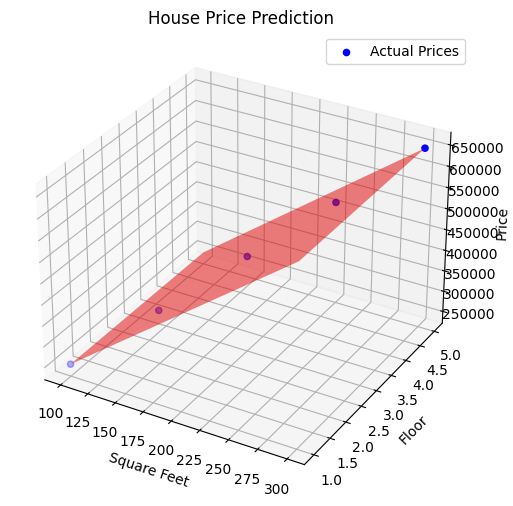

In [2]:
# 引入所需的庫
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

# 假設的房屋坪數和樓層數據
square_feet = np.array([100, 150, 200, 250, 300]).reshape(-1, 1)  # 坪數，單位：平方英尺
floor = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # 樓層

# 假設的房屋價格數據
prices = np.array([250000, 350000, 450000, 550000, 650000])  # 房價，單位：美元

# 創建特徵矩陣X，包括坪數和樓層
X = np.hstack((square_feet, floor))

# 創建線性回歸模型
model = LinearRegression()

# 使用坪數和樓層來擬合房價
model.fit(X, prices)

# 打印出截距和斜率
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# 預測房屋價格
new_square_feet = 180  # 新房屋的坪數
new_floor = 3  # 新房屋的樓層
predicted_price = model.predict([[new_square_feet, new_floor]])
print("Predicted Price for a house with", new_square_feet, "square feet and", new_floor, "floors:", predicted_price)

# 可視化擬合結果
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(square_feet, floor, prices, color='blue', label='Actual Prices')
ax.set_xlabel('Square Feet')
ax.set_ylabel('Floor')
ax.set_zlabel('Price')
ax.set_title('House Price Prediction')

# 生成擬合平面
X1, X2 = np.meshgrid(square_feet, floor)
Z = model.intercept_ + model.coef_[0]*X1 + model.coef_[1]*X2
ax.plot_surface(X1, X2, Z, alpha=0.5, rstride=100, cstride=100, color='red')

plt.legend()
plt.show()


##ex2 支持向量機 基礎範例

In [3]:
import numpy as np
from sklearn.svm import SVC

# 建立數據
X = np.array([[1, 2], [5, 8], [1.5, 1.8], [8, 8], [1, 0.6], [9, 11]])
y = [0, 1, 0, 1, 0, 1]

# 建立SVM模型
model = SVC(kernel='linear', C=1.0)
model.fit(X, y)

# 預測結果
print('Pred: ', model.predict([[1, 2]]))

Pred:  [0]


##ex3 支持向量機 實機案例(鳶尾花分類範例)

Accuracy: 0.9
Confusion Matrix:
 [[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]


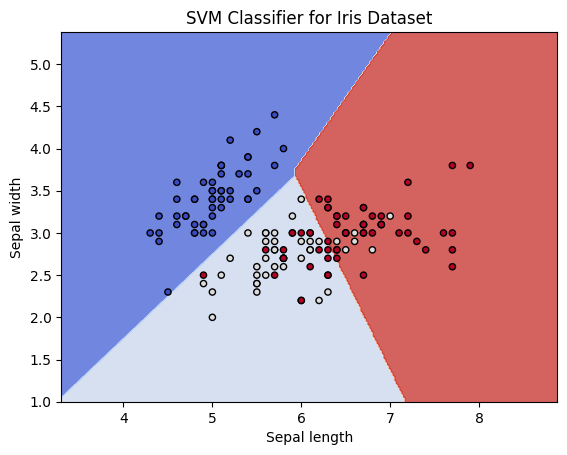

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# 載入鳶尾花數據集
iris = datasets.load_iris()
X = iris.data[:, :2]  # 僅使用前兩個特徵以便可視化
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)		# 將數據集劃分為訓練集和測試集

# 建立SVM模型
model = SVC(kernel='linear', C=1.0)
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估模型
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

# 繪製決策邊界
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# 將結果可視化
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVM Classifier for Iris Dataset')
plt.show()


##ex4 單純貝氏分類器 基礎範例

##ex5 單純貝氏分類器 實際案例()

##ex6 決策樹 基礎範例

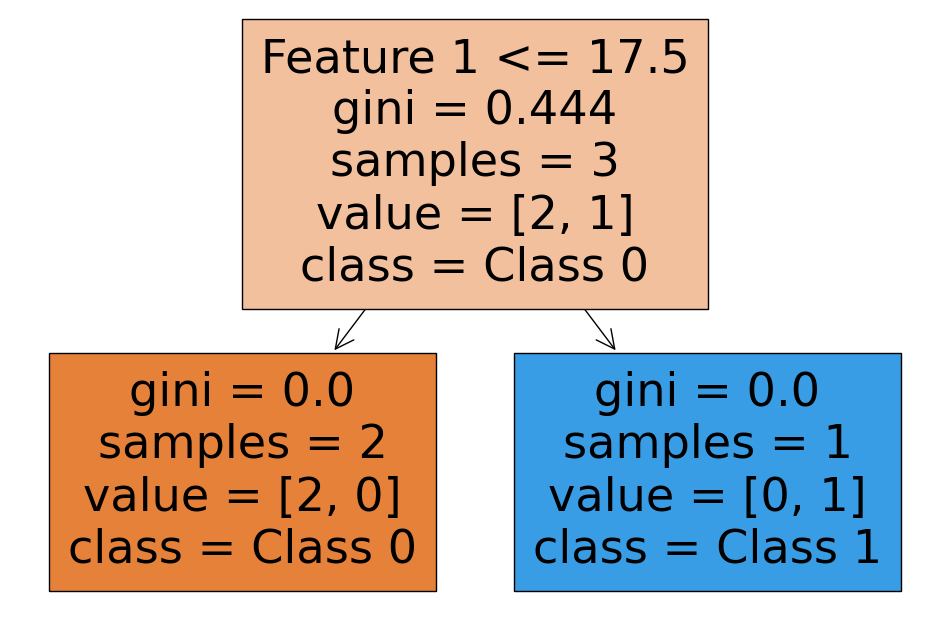

In [5]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# 準備數據
X = [[0, 10], [5, 10], [30, 1]]
y = [0, 0, 1]

# 訓練決策樹模型
clf = DecisionTreeClassifier()
clf = clf.fit(X, y)

# 繪製決策樹
plt.figure(figsize=(12,8))
tree.plot_tree(clf, filled=True, feature_names=["Feature 1", "Feature 2"], class_names=["Class 0", "Class 1"])
plt.show()


##ex7 決策樹 實際案例(使用決策樹分類鳶尾花)

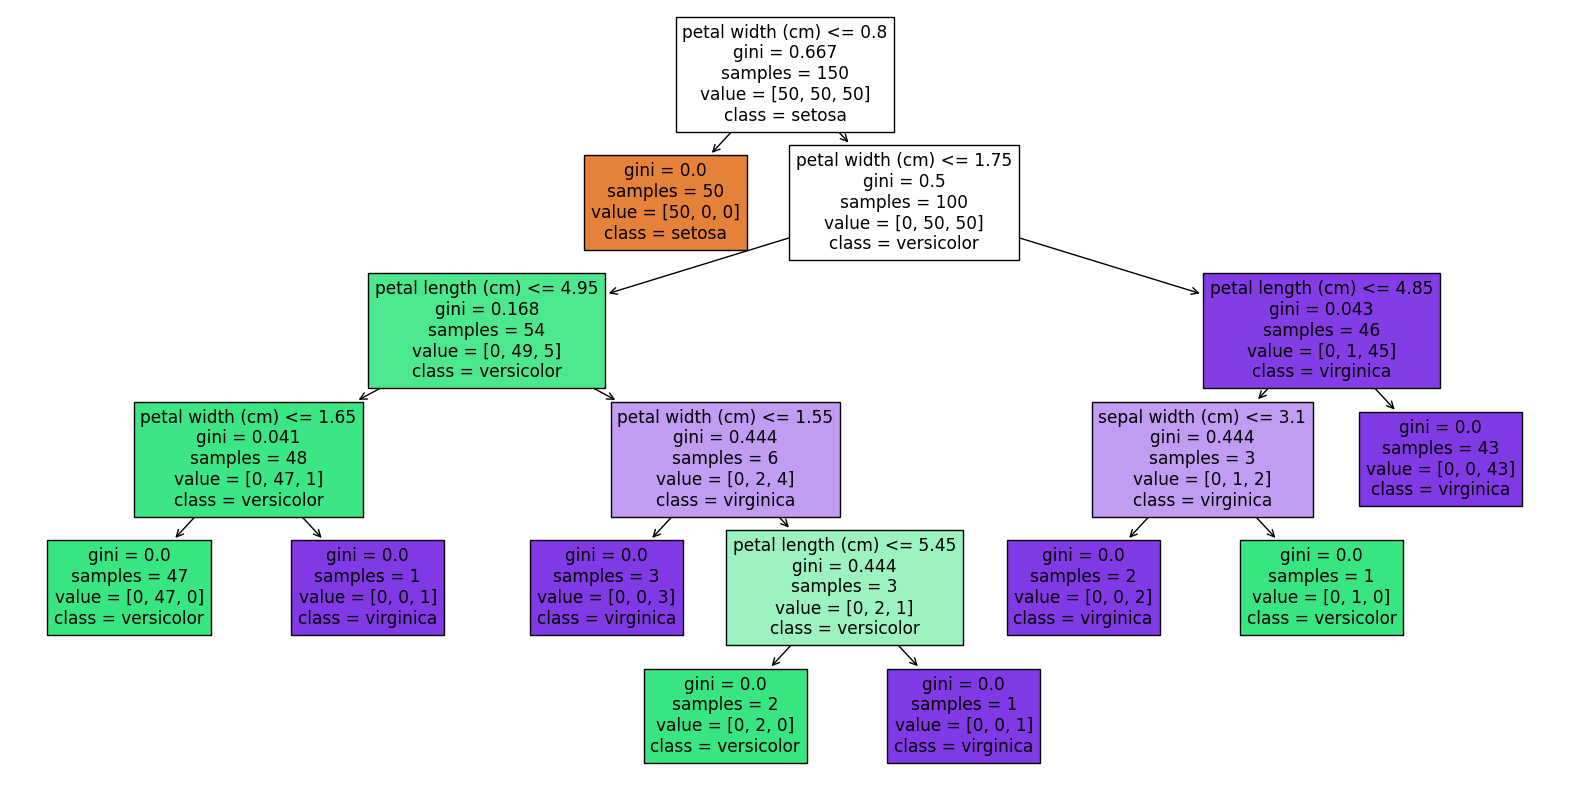

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# 載入Iris資料集
iris = load_iris()
X = iris.data
y = iris.target

# 使用訓練資料生成決策樹模型
clf = DecisionTreeClassifier()
clf = clf.fit(X, y)

# 繪製決策樹
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()


##ex8 隨機森林 基礎範例

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 生成虛擬數據
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# 將數據劃分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化隨機森林分類器
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# 訓練模型
rf_classifier.fit(X_train, y_train)

# 預測測試集
y_pred = rf_classifier.predict(X_test)

# 評估模型
accuracy = accuracy_score(y_test, y_pred)
print("準確率:", accuracy)

準確率: 0.9


##ex9 隨機森林 實際案例(鳶尾花隨機森林分類案例)

In [8]:
# 引入必要的庫
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 載入鳶尾花數據集
iris = load_iris()
X = iris.data
y = iris.target

# 將數據劃分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化隨機森林分類器
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# 訓練模型
rf_classifier.fit(X_train, y_train)

# 預測測試集
y_pred = rf_classifier.predict(X_test)

# 評估模型
accuracy = accuracy_score(y_test, y_pred)
print("準確率:", accuracy)


準確率: 1.0


##ex10 類神經網路 基礎範例

##ex11 類神經網路 實際案例()

##ex12 K近鄰演算法 基礎範例

In [9]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# 建立數據
X = np.array([[1, 2], [5, 8], [1.5, 1.8], [8, 8], [1, 0.6], [9, 11]])
y = [0, 1, 0, 1, 0, 1]

# 建立KNN模型
k = 3  # 選擇最近的3個點
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X, y)

# 預測結果
print('Pred: ', model.predict([[1, 2]]))

Pred:  [0]


##ex13 K近鄰演算法 實際案例(葡萄酒分類案例)

In [11]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# 載入葡萄酒數據集
wine = load_wine()
X = wine.data
y = wine.target

# 將數據集劃分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 標準化數據
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 建立KNN模型
k = 5  # 選擇最近的5個點
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# 預測
y_pred = knn.predict(X_test)

# 評估模型
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

# 進行單個樣本預測
sample = np.array([[13.0, 2.0, 2.5, 15.0, 85.0, 2.0, 2.0, 0.4, 1.5, 5.0, 1.0, 3.0, 1000]])
sample_scaled = scaler.transform(sample)
sample_pred = knn.predict(sample_scaled)

print("Prediction for sample:", sample_pred)

Accuracy: 0.9444444444444444
Confusion Matrix:
 [[14  0  0]
 [ 1 12  1]
 [ 0  0  8]]
Prediction for sample: [0]


##ex14 主成分分析 基礎範例

In [12]:
import numpy as np
from sklearn.decomposition import PCA

# 建立資料
x = [[6, 10, 5, 1, 5], [50, 60, 44, 50 ,60], [66, 88, 10, 12, 55], [5, 8, 2, 0, 1]]
y = [1, 0, 0, 1]

# 創建 PCA 模型並擬合數據
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

print('降維前({}維)：{}'.format(np.array(x).shape[1], x))
print('降維後({}維)：{}'.format(np.array(x_pca).shape[1], x_pca))

降維前(5維)：[[6, 10, 5, 1, 5], [50, 60, 44, 50, 60], [66, 88, 10, 12, 55], [5, 8, 2, 0, 1]]
降維後(2維)：[[-51.12631811   0.26375662]
 [ 51.08529853  30.82674723]
 [ 55.83665596 -29.52571392]
 [-55.79563638  -1.56478993]]


##ex15 主成分分析 實際案例(將鳶尾花4維資料降低到2維)

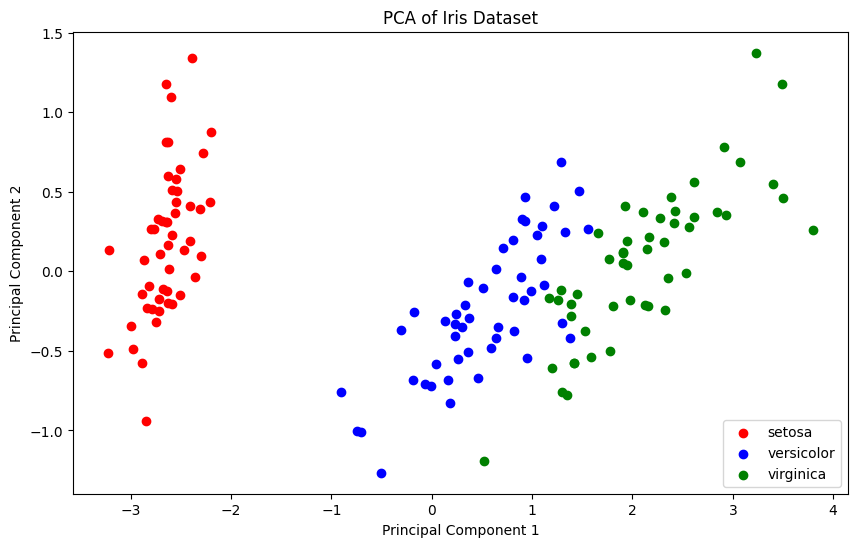

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# 載入鳶尾花數據集
iris = load_iris()
X = iris.data
y = iris.target

# 創建 PCA 模型並擬合數據
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 繪製 PCA 結果
plt.figure(figsize=(10, 6))

plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], c='red', label=iris.target_names[0])
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], c='blue', label=iris.target_names[1])
plt.scatter(X_pca[y == 2, 0], X_pca[y == 2, 1], c='green', label=iris.target_names[2])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend()
plt.show()

##ex16 非負矩陣 基礎範例

##ex17 非負矩陣 實機案例()

##ex18 K平均分群演算法 基礎範例

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


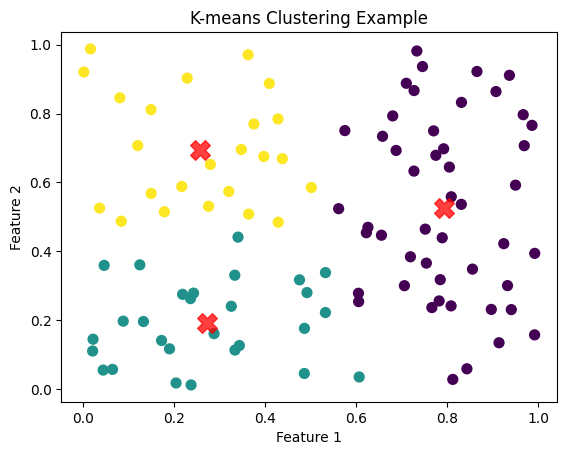

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 生成一些隨機數據點
X = np.random.rand(100, 2)  # 100個數據點，每個數據點有2個特徵

# 建立K-means模型，設置聚類數為3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# 獲取聚類結果
y_kmeans = kmeans.predict(X)

# 獲取聚類中心
centers = kmeans.cluster_centers_

# 繪製數據點及其聚類結果
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-means Clustering Example')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

##ex19 K平均分群演算法 實際案例(鳶尾花分群)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


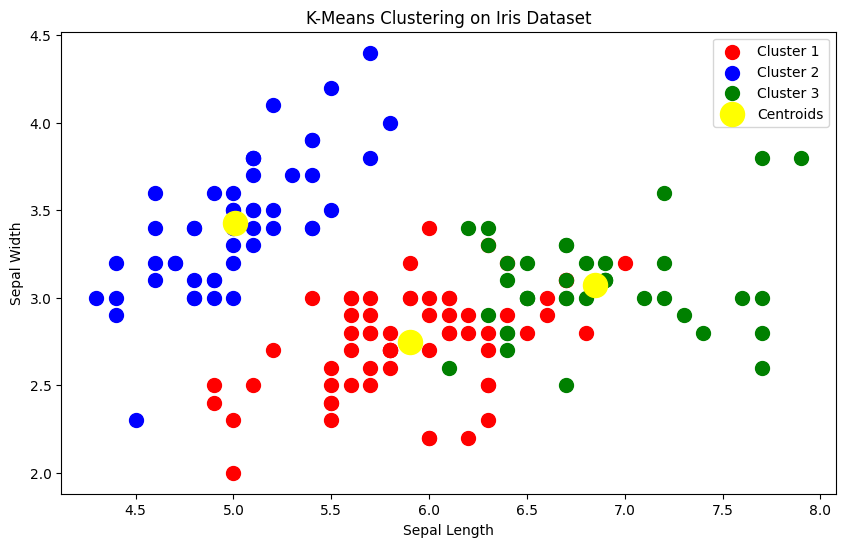

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# 載入鳶尾花數據集
iris = load_iris()
X = iris.data
y = iris.target

# 創建 K-Means 模型並擬合數據
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# 獲取集群中心和預測的集群標籤
centers = kmeans.cluster_centers_
labels = kmeans.labels_
# 繪製集群結果
plt.figure(figsize=(10, 6))
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[labels == 2, 0], X[labels == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(centers[:, 0], centers[:, 1], s=300, c='yellow', label='Centroids')
plt.title('K-Means Clustering on Iris Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

##ex20 高斯混合分布 基礎範例

##ex21 高斯混合分布 實際案例()

##ex22 混淆矩陣

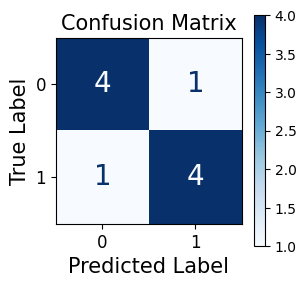

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 假設有真實標籤和預測標籤，只有兩個類別 0 和 1
y = np.array([0, 1, 1, 0, 1, 0, 0, 1, 0, 1])
y_pred = np.array([0, 1, 0, 0, 1, 0, 1, 1, 0, 1])

# 計算混淆矩陣
cm = confusion_matrix(y, y_pred)

# 繪製混淆矩陣
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
fig, ax = plt.subplots(figsize=(3, 3))  # 調整圖形大小
disp.plot(cmap=plt.cm.Blues, ax=ax, values_format='d')
# 調整混淆矩陣內部數字的字體大小
for text in disp.text_.ravel():
    text.set_fontsize(20)

plt.title('Confusion Matrix', fontsize=15)  # 調整標題字體大小
plt.xlabel('Predicted Label', fontsize=15)  # 調整 x 軸標籤字體大小
plt.ylabel('True Label', fontsize=15)  # 調整 y 軸標籤字體大小
plt.xticks(fontsize=12)  # 調整 x 軸刻度字體大小
plt.yticks(fontsize=12)  # 調整 y 軸刻度字體大小
plt.show()

##ex23 正確率(Accuracy)

In [26]:
from sklearn.metrics import accuracy_score
y = [1, 1, 0, 0]
y_pred = [1, 0, 1, 1]
accuracy_score(y, y_pred)    # y為正確標籤, y_pred為預測結果

0.25

##ex24 精確率(Precision)

In [27]:
from sklearn.metrics import precision_score
y = [1, 1, 0, 0]
y_pred = [1, 0, 1, 1]
precision_score(y, y_pred)    # y為正確標籤, y_pred為預測結果

0.3333333333333333

##ex25 召回率(Recall)

In [28]:
from sklearn.metrics import recall_score
y = [1, 1, 0, 0]
y_pred = [1, 0, 1, 1]
recall_score(y, y_pred)    # y為正確標籤, y_pred為預測結果

0.5

##ex26 F1值(F1-Score)

In [29]:
from sklearn.metrics import f1_score
y = [1, 1, 0, 0]
y_pred = [1, 0, 1, 1]
f1_score(y, y_pred)    # y為正確標籤, y_pred為預測結果

0.4

##ex27 基礎範例(ROC曲線與AUC範例)

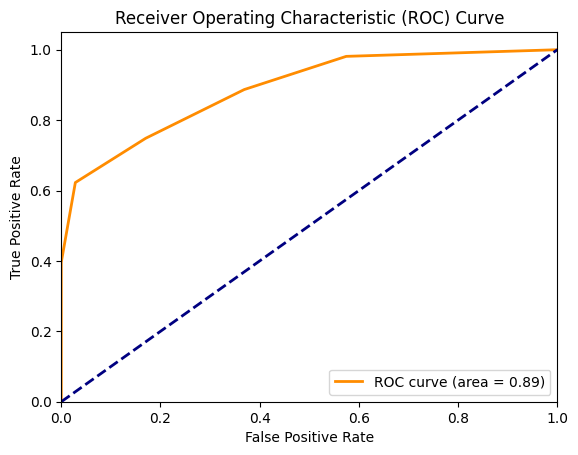

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc

# 創建示例數據
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# 訓練KNN模型
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# 預測概率
y_pred_prob = model.predict_proba(X_test)[:, 1]

# 計算ROC曲線
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# 繪製ROC曲線
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

##ex28 Mean Squared Error, MSE

In [31]:
import numpy as np
from sklearn.metrics import mean_squared_error

# 實際觀測值
y_true = np.array([3, -0.5, 2, 7])
# 模型預測值
y_pred = np.array([2.5, 0.0, 2, 8])

# 計算均方誤差
mse = mean_squared_error(y_true, y_pred)

print("均方誤差 (MSE):", mse)

均方誤差 (MSE): 0.375


##ex29 Root Mean Squared Error, RMSE

In [32]:
import numpy as np
from sklearn.metrics import mean_squared_error

# 實際觀測值
y_true = np.array([3, -0.5, 2, 7])
# 模型預測值
y_pred = np.array([2.5, 0.0, 2, 8])

# 計算均方根誤差
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print("均方根誤差 (RMSE):", rmse)

均方根誤差 (RMSE): 0.6123724356957945


##ex30 Mean Absolute Error, MAE

In [33]:
import numpy as np
from sklearn.metrics import mean_absolute_error

# 實際觀測值
y_true = np.array([3, -0.5, 2, 7])
# 模型預測值
y_pred = np.array([2.5, 0.0, 2, 8])

# 計算平均絕對誤差
mae = mean_absolute_error(y_true, y_pred)

print("平均絕對誤差 (MAE):", mae)

平均絕對誤差 (MAE): 0.5


##ex31 Coefficient of Determination, R^2

In [34]:
import numpy as np
from sklearn.metrics import r2_score

# 實際觀測值
y_true = np.array([3, -0.5, 2, 7])
# 模型預測值
y_pred = np.array([2.5, 0.0, 2, 8])

# 計算決定係數
r2 = r2_score(y_true, y_pred)

print("決定係數 (R^2):", r2)

決定係數 (R^2): 0.9486081370449679


##ex32 交叉驗證 K-Fold

In [35]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# 創建簡單數據集
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8], [8, 9], [9, 10], [10, 11]])
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

# 初始化KNN模型，設置K值
knn = KNeighborsClassifier(n_neighbors=3)

# 設定交叉驗證的K值
k = 5

# 使用cross_val_score進行K-fold交叉驗證
scores = cross_val_score(knn, X, y, cv=k)

# 計算平均準確率
average_accuracy = np.mean(scores)

print(f'每折準確率: {scores}')
print(f'平均準確率: {average_accuracy:.2f}')

每折準確率: [0.5 1.  1.  1.  1. ]
平均準確率: 0.90


##ex33 交叉驗證 Holdout

In [36]:
import numpy as np
from sklearn.model_selection import train_test_split

# 創建簡單數據集
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8], [8, 9], [9, 10], [10, 11]])
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

# 將數據集分成訓練集、驗證集和測試集（60%、20%、20%）
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

print('訓練集: ', X_train.shape, y_train.shape)
print('驗證集: ', X_val.shape, y_val.shape)
print('測試集: ', X_test.shape, y_test.shape)

訓練集:  (6, 2) (6,)
驗證集:  (2, 2) (2,)
測試集:  (2, 2) (2,)


##ex34 交叉驗證 Leave One Out

In [37]:
import numpy as np
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 創建簡單數據集
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8], [8, 9], [9, 10]])
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1])

knn = KNeighborsClassifier(n_neighbors=3)     # 初始化KNN模型
loo = LeaveOneOut()    # 初始化Leave-One-Out (LOO)交叉驗證
accuracies = []    # 儲存每次迭代的準確率

# 進行LOO交叉驗證
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # 訓練模型
    knn.fit(X_train, y_train)
    # 預測
    y_pred = knn.predict(X_test)
    # 計算準確率
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

average_accuracy = np.mean(accuracies)    # 計算平均準確率
print(f'每次準確率: {accuracies}')
print(f'平均準確率: {average_accuracy:.2f}')

每次準確率: [1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0]
平均準確率: 0.89


##ex35 交叉驗證 Random Subsampling

In [38]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 創建簡單數據集
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8], [8, 9], [9, 10]])
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1])

knn = KNeighborsClassifier(n_neighbors=3)   # 初始化KNN模型
iterations = 10  # 定義迭代次數
accuracies = []  # 儲存每次迭代的準確率

for i in range(iterations):
    # 使用隨機子採樣劃分數據集，80%訓練集和20%測試集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    knn.fit(X_train, y_train)    # 訓練模型
    y_pred = knn.predict(X_test)    # 預測
    accuracy = accuracy_score(y_test, y_pred) # 計算準確率
    accuracies.append(accuracy)
# 計算平均準確率
average_accuracy = np.mean(accuracies)

print(f'每次準確率: {accuracies}')
print(f'平均準確率: {average_accuracy:.2f}')

每次準確率: [1.0, 1.0, 0.5, 1.0, 0.5, 0.5, 1.0, 1.0, 0.5, 0.5]
平均準確率: 0.75


##ex36 交叉驗證 Bootstrapping

In [39]:
import numpy as np

# 提供的數據
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8], [8, 9], [9, 10]])
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1])

# Bootstrapping 迭代次數
bootstrap_iterations = 3

# 儲存每次抽樣的平均值
bootstrap_means = []

for i in range(bootstrap_iterations):
  # 隨機抽取索引
  indices = np.random.randint(0, len(X), size=len(X))
  # 通過索引從原始數據集中抽樣
  X_bootstrap = X[indices]
  y_bootstrap = y[indices]
  # 從原始數據集中排除已經抽取的樣本，得到驗證集
  X_validation = np.delete(X, indices, axis=0)
  y_validation = np.delete(y, indices, axis=0)
  print('隨機訓練集: ', X_bootstrap.tolist())
  print('隨機驗證集: ', X_validation.tolist())
  print()

隨機訓練集:  [[6, 7], [3, 4], [8, 9], [3, 4], [4, 5], [2, 3], [8, 9], [2, 3], [9, 10]]
隨機驗證集:  [[1, 2], [5, 6], [7, 8]]

隨機訓練集:  [[3, 4], [1, 2], [5, 6], [4, 5], [2, 3], [1, 2], [9, 10], [3, 4], [3, 4]]
隨機驗證集:  [[6, 7], [7, 8], [8, 9]]

隨機訓練集:  [[1, 2], [7, 8], [9, 10], [1, 2], [5, 6], [5, 6], [9, 10], [2, 3], [8, 9]]
隨機驗證集:  [[3, 4], [4, 5], [6, 7]]



##ex37 批次量 實際案例(使用Pytorch搭建NN搭配Batch辨識手寫數據集)  
## 注意這裡要切換成GPU模式

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# 準備數據
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
# 下載並加載訓練數據集
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)

# 加載測試數據集
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

# 定義模型
model = nn.Sequential(
    nn.Linear(28*28, 256),
    nn.ReLU(),
    nn.Linear(256, 64),
    nn.ReLU(),
    nn.Linear(64, 10)
).cuda()

# 定義損失函數和優化器
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(params=model.parameters(), lr=0.0001)

# 訓練模型
num_epochs = 10
for epoch in range(num_epochs):
  model.train()  # 設置模型為訓練模式

  total_loss = 0
  total_correct = 0
  total_samples = 0


# 遍歷訓練集
  for batch_idx, (X_batch, y_batch) in enumerate(train_loader):
    X_batch = X_batch.view(-1, 28*28).cuda()  # 轉換輸入格式並移到GPU
    y_batch = y_batch.cuda()  # 將標籤移到GPU

    optimizer.zero_grad()  # 清除梯度
    pred = model(X_batch)  # 前向傳播
    loss = loss_function(pred, y_batch)  # 計算損失
    loss.backward()  # 反向傳播
    optimizer.step()  # 更新參數

    # 紀錄每次迭代的結果
    total_loss += loss.item()
    _, predicted = torch.max(pred, 1)
    total_correct += (predicted == y_batch).sum().item()
    total_samples += y_batch.size(0)

    # 每隔一段時間打印迭代結果，這裡以每100個批次為例
    if batch_idx % 100 == 0:
      print(f'Epoch {epoch+1}/{num_epochs}, Iteration {batch_idx}/{len(train_loader)}, Loss: {loss.item():.4f}')

  # 計算平均loss和訓練準確率
  average_loss = total_loss / len(train_loader)
  train_accuracy = total_correct / total_samples
  # 驗證模型
  model.eval()  # 設置模型為評估模式
  correct = 0
  total = 0

  with torch.no_grad():
    # 遍歷測試集
    for X_batch, y_batch in test_loader:
      X_batch = X_batch.view(-1, 28*28).cuda()
      y_batch = y_batch.cuda()

      outputs = model(X_batch)
      _, predicted = torch.max(outputs.data, 1)
      total += y_batch.size(0)
      correct += (predicted == y_batch).sum().item()

  # 計算測試準確率
  test_accuracy = correct / total

  # 打印當前epoch的訓練和測試結果
  print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {average_loss:.4f}, Train Accuracy: {train_accuracy * 100:.2f}%, Test Accuracy: {test_accuracy * 100:.2f}%')

print("訓練完成")


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:02<00:00, 4551996.13it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 133686.74it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1260163.17it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4568472.13it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch 1/10, Iteration 0/1875, Loss: 2.2965
Epoch 1/10, Iteration 100/1875, Loss: 1.5153
Epoch 1/10, Iteration 200/1875, Loss: 0.8782
Epoch 1/10, Iteration 300/1875, Loss: 0.6985
Epoch 1/10, Iteration 400/1875, Loss: 0.7472
Epoch 1/10, Iteration 500/1875, Loss: 0.5557
Epoch 1/10, Iteration 600/1875, Loss: 0.4279
Epoch 1/10, Iteration 700/1875, Loss: 0.2458
Epoch 1/10, Iteration 800/1875, Loss: 0.3180
Epoch 1/10, Iteration 900/1875, Loss: 0.4265
Epoch 1/10, Iteration 1000/1875, Loss: 0.2656
Epoch 1/10, Iteration 1100/1875, Loss: 0.4712
Epoch 1/10, Iteration 1200/1875, Loss: 0.3567
Epoch 1/10, Iteration 1300/1875, Loss: 0.6164
Epoch 1/10, Iteration 1400/1875, Loss: 0.4418
Epoch 1/10, Iteration 1500/1875, Loss: 0.5029
Epoch 1/10, Iteration 1600/1875, Loss: 0.3942
Epoch 1/10, Iteration 1700/1875, Loss: 0.1662
Epoch 1/10, Iteration 1800/1875, Loss: 0.2215
Epoch 1/10, Train Loss: 0.5640, Train Accuracy: 84.98%, Test Ac